In [1]:
import pandas as pd
import numpy as np
import math
import sys
import seaborn
import matplotlib.pyplot as plt
# example of training a final classification model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from keras import callbacks
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow as tf
from sklearn import metrics
from tensorflow.keras.models import load_model


c:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import tensorflow as tf
print( f'tensorflow_ver : {tf.__version__}')
import keras
print(f'keras_ver : {keras.__version__}')
import pandas
print(f'pandas_ver : {pandas.__version__}')
import sklearn
print(f'sklearn_ver : {sklearn.__version__}')
import sys
print( f'python_ver : {sys.version[0:5]}' )

tensorflow_ver : 2.9.1
keras_ver : 2.9.0
pandas_ver : 1.4.2
sklearn_ver : 1.0.2
python_ver : 3.9.1


In [5]:
dataset = pd.read_csv('./혈당예측/03. 개발 및 검증 데이터/bloodsugar_pre_0113_train.csv')
dataset

,HR,RR,HRV,SDNN,RMSSD,PNN50,gender,age,blood_sugar
0,69,6,95,12.299774,17.031519,0.00010,0,21,94
1,66,8,72,12.299774,17.031519,0.00010,0,21,94
2,67,7,73,12.299774,17.031519,0.00010,0,21,94
3,66,8,66,12.299774,17.031519,0.00010,0,21,94
4,66,6,67,12.299774,17.031519,0.00010,0,21,94
...,...,...,...,...,...,...,...,...,...
308934,73,10,285,25.470000,3.570000,0.00001,0,27,142
308935,73,10,281,25.470000,3.570000,0.00001,0,27,142
308936,73,10,281,25.470000,3.570000,0.00001,0,27,142
308937,73,10,281,25.470000,3.570000,0.00001,0,27,142


In [6]:
data_full = dataset
data_full[data_full['SDNN']<1].index

Int64Index([], dtype='int64')

        HR  RR  HRV       SDNN      RMSSD    PNN50  gender  age
0       69   6   95  12.299774  17.031519  0.00010       0   21
1       66   8   72  12.299774  17.031519  0.00010       0   21
2       67   7   73  12.299774  17.031519  0.00010       0   21
3       66   8   66  12.299774  17.031519  0.00010       0   21
4       66   6   67  12.299774  17.031519  0.00010       0   21
...     ..  ..  ...        ...        ...      ...     ...  ...
308934  73  10  285  25.470000   3.570000  0.00001       0   27
308935  73  10  281  25.470000   3.570000  0.00001       0   27
308936  73  10  281  25.470000   3.570000  0.00001       0   27
308937  73  10  281  25.470000   3.570000  0.00001       0   27
308938  73  10  281  25.470000   3.570000  0.00001       0   27

[308939 rows x 8 columns]
(247151, 8)
(61788, 8)
Epoch 1/10
4635/4635 [==============================] - 6s 1ms/step - loss: 1059.5334 - accuracy: 0.0000e+00 - val_loss: 409.2305 - val_accuracy: 0.0000e+00
Epoch 2/10
4635/4635 [===

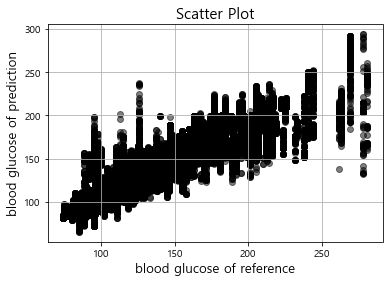

=======clarke_error_grid region data ======
[300584, 8196, 3, 156, 0]


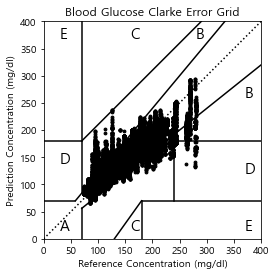

['scaler_0110_result_all_01.bin']

In [8]:
# Reading the traing file
# df = pd.read_csv('data_mapping_20s_0107_change.csv')
df = data_full
result_df = df

# Read the verification file
df1 = pd.read_csv('./혈당예측/03. 개발 및 검증 데이터/test_data(blood_sugar_predict).csv')
result_df1 = df1


df.columns
df


X = df.drop('blood_sugar',axis=1)
print(X)
y = df['blood_sugar']
print("==============================")

X1 = df.drop('blood_sugar',axis=1)
y1 = df['blood_sugar']

X2 = df1.drop('blood_sugar', axis=1)
y2 = df1['blood_sugar']




X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)


# input scaling
# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler = StandardScaler()
# StandardScaler standardization file SAVE!!!!
# X_train.to_csv('scaler_0110_result_all_01.csv')

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# scale 변환
X1 = scaler.transform(X1)

print(X_train.shape)
print(X_test.shape)



#  (20210717) 과적합을 해결하기 위해 
#  kernel_regularizer, activity_regularizer, Dropout 을 적용하였다
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, kernel_initializer='he_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.001)))
# model.add(tf.keras.layers.Dropout(0.3))
# model.add(tf.keras.layers.Dense(380, activation=tf.nn.relu, kernel_initializer='he_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.001)))
# model.add(tf.keras.layers.Dropout(0.2))
# model.add(tf.keras.layers.Dense(320, activation=tf.nn.relu, kernel_initializer='he_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.001)))
# model.add(tf.keras.layers.Dropout(0.1))
# #model.add(tf.keras.layers.Dense(256, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
# model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
# model.add(tf.keras.layers.Dense(192, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
# model.add(tf.keras.layers.Dense(64, activation=tf.nn.relu, kernel_initializer='he_normal', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
model.add(tf.keras.layers.Dense(32, activation=tf.nn.relu, kernel_initializer='normal'))
model.add(tf.keras.layers.Dense(1, kernel_initializer='zeros', activation='linear'))
rmse = tf.keras.metrics.RootMeanSquaredError()
msle = tf.keras.losses.MeanSquaredLogarithmicError()
# opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile( loss='mse',  optimizer=Adam(learning_rate=0.0005,beta_1=0.99), metrics=['accuracy'])



# fit model
history = model.fit(X_train, y_train.values, epochs=10, batch_size=40, validation_split = 0.25, verbose=1)



## Save the model to the computer - check the path
# Model 저장 
model.save('scaler_0110_result_all_01.h5')


## plot setting 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)




def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 score: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 score: ', r2_square)



y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training file scaler application(X1 predict )
y1_predict = model.predict(X1)


# Apply test file scaler(X2 predict)
X2 = scaler.transform(X2)
y2_predict = model.predict(X2)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

print("================== result random reference ================")
print("================== result random reference ================")
print_evaluate(y1, y1_predict, train=False)

print("================== result random reference 2000 ================")
print("================== result random reference 2000 ================")
print_evaluate(y2, y2_predict, train=False)


result_df['predict_result'] = y1_predict
# result_df.to_csv(r"result_tr.csv")
print(y1_predict)

result_df1['predict_result'] = y2_predict
# result_df1.to_csv(r"result1_vd.csv")
print(y2_predict)


#======================================================
# Comparison of predicted and actual values
testY2_predict = model.predict(X2)
for i in range(len(testY2_predict)):
    label = y2[i]
    prediction = testY2_predict[i]
    print('RealSugar| {:} | PredictSugar| {:}'.format(label, prediction))
#======================================================



# ====================Scatter Plot==================
# draw scatter plot
plt.title("Scatter Plot", fontsize=15)
plt.scatter(y1, y1_predict, color='black', alpha=.5)
plt.xlabel("blood glucose of reference", fontsize=13)
plt.ylabel("blood glucose of prediction", fontsize=13)
plt.grid()
plt.show()
# ====================Scatter Plot==================




#=========================================
# import matplotlib.pyplot as plt


#This function takes in the reference values and the prediction values as lists and returns a list with each index corresponding to the total number
#of points within that zone (0=A, 1=B, 2=C, 3=D, 4=E) and the plot
def clarke_error_grid(ref_values, pred_values, title_string):
    #Checking to see if the lengths of the reference and prediction arrays are the same
    assert (len(ref_values) == len(pred_values)), "Unequal number of values (reference : {}) (prediction : {}).". format(len(ref_values), len(pred_values))
    #Checks to see if the values are within the normal physiological range, otherwise it gives a warning
    if max(ref_values) > 400 or max(pred_values) > 400:
        print ("Input Warning: the maximum reference value {} or the maximum prediction value {} exceeds the normal physiological range of glucose (<400 mg/dl).".format(max(ref_values), max(pred_values)))
    if min(ref_values) < 0 or min(pred_values) < 0:
        print ("Input Warning: the minimum reference value {} or the minimum prediction value {} is less than 0 mg/dl.".format(min(ref_values),  min(pred_values)))
    #Clear plot
    plt.clf()
    #Set up plot
    plt.scatter(ref_values, pred_values, marker='o', color='black', s=8)
    plt.title(title_string + " Clarke Error Grid")
    plt.xlabel("Reference Concentration (mg/dl)")
    plt.ylabel("Prediction Concentration (mg/dl)")
    plt.xticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.yticks([0, 50, 100, 150, 200, 250, 300, 350, 400])
    plt.gca().set_facecolor('white')
    #Set axes lengths
    plt.gca().set_xlim([0, 400])
    plt.gca().set_ylim([0, 400])
    plt.gca().set_aspect((400)/(400))
    #Plot zone lines
    plt.plot([0,400], [0,400], ':', c='black')                      #Theoretical 45 regression line
    plt.plot([0, 175/3], [70, 70], '-', c='black')
    #plt.plot([175/3, 320], [70, 400], '-', c='black')
    plt.plot([175/3, 400/1.2], [70, 400], '-', c='black')           #Replace 320 with 400/1.2 because 100*(400 - 400/1.2)/(400/1.2) =  20% error
    plt.plot([70, 70], [84, 400],'-', c='black')
    plt.plot([0, 70], [180, 180], '-', c='black')
    plt.plot([70, 290],[180, 400],'-', c='black')
    # plt.plot([70, 70], [0, 175/3], '-', c='black')
    plt.plot([70, 70], [0, 56], '-', c='black')                     #Replace 175.3 with 56 because 100*abs(56-70)/70) = 20% error
    # plt.plot([70, 400],[175/3, 320],'-', c='black')
    plt.plot([70, 400], [56, 320],'-', c='black')
    plt.plot([180, 180], [0, 70], '-', c='black')
    plt.plot([180, 400], [70, 70], '-', c='black')
    plt.plot([240, 240], [70, 180],'-', c='black')
    plt.plot([240, 400], [180, 180], '-', c='black')
    plt.plot([130, 180], [0, 70], '-', c='black')
    #Add zone titles
    plt.text(30, 15, "A", fontsize=15)
    plt.text(370, 260, "B", fontsize=15)
    plt.text(280, 370, "B", fontsize=15)
    plt.text(160, 370, "C", fontsize=15)
    plt.text(160, 15, "C", fontsize=15)
    plt.text(30, 140, "D", fontsize=15)
    plt.text(370, 120, "D", fontsize=15)
    plt.text(30, 370, "E", fontsize=15)
    plt.text(370, 15, "E", fontsize=15)

    #Statistics from the data
    zone = [0] * 5
    for i in range(len(ref_values)):
        if (ref_values[i] <= 70 and pred_values[i] <= 70) or (pred_values[i] <= 1.2*ref_values[i] and pred_values[i] >= 0.8*ref_values[i]):
            zone[0] += 1    #Zone A
        elif (ref_values[i] >= 180 and pred_values[i] <= 70) or (ref_values[i] <= 70 and pred_values[i] >= 180):
            zone[4] += 1    #Zone E
        elif ((ref_values[i] >= 70 and ref_values[i] <= 290) and pred_values[i] >= ref_values[i] + 110) or ((ref_values[i] >= 130 and ref_values[i] <= 180) and (pred_values[i] <= (7/5)*ref_values[i] - 182)):
            zone[2] += 1    #Zone C
        elif (ref_values[i] >= 240 and (pred_values[i] >= 70 and pred_values[i] <= 180)) or (ref_values[i] <= 175/3 and pred_values[i] <= 180 and pred_values[i] >= 70) or ((ref_values[i] >= 175/3 and ref_values[i] <= 70) and pred_values[i] >= (6/5)*ref_values[i]):
            zone[3] += 1    #Zone D
        else:
            zone[1] += 1    #Zone B
    return plt, zone


#=========================================
# function parameter
#  def clarke_error_grid(ref_values, pred_values, title_string): 
#========================================== 
print('=======clarke_error_grid region data ======')
plt, zone = clarke_error_grid(y1, y1_predict, 'Blood Glucose')
print(zone)
plt.show()


# In[12]:


#from sklearn.metrics import r2_score
#r2_score(y_test, y_test_pred)
# print('R2 score: ', r2_score)

# In[11]:


import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from joblib import dump, load


dump(scaler, 'scaler_0110_result_all_01.bin', compress=True)








In [13]:
model_A = keras.models.load_model('scaler_0110_result_all_01.h5')
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(tf.keras.layers.Dense(380, activation=tf.nn.relu, kernel_initializer='he_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.001)))
model_B_on_A.add(keras.layers.Dense(1, activation='linear'))

In [14]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [15]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable=False
    
model_B_on_A.compile(loss='mse',  optimizer=Adam(learning_rate=0.0005,beta_1=0.99), metrics=['accuracy'])

In [17]:
history = model_B_on_A.fit(X_train, y_train.values, epochs=4,
                           validation_split = 0.25)

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True
    
model_B_on_A.compile(loss="mse",  optimizer=Adam(learning_rate=0.0005,beta_1=0.99), metrics=['accuracy'])
history = model_B_on_A.fit(X_train,y_train.values, epochs=16,
                           validation_split = 0.25)

Epoch 1/4
5793/5793 [==============================] - 6s 991us/step - loss: 354.0648 - accuracy: 0.0000e+00 - val_loss: 163.1648 - val_accuracy: 0.0000e+00
Epoch 2/4
5793/5793 [==============================] - 6s 958us/step - loss: 158.8730 - accuracy: 0.0000e+00 - val_loss: 159.1633 - val_accuracy: 0.0000e+00
Epoch 3/4
5793/5793 [==============================] - 6s 977us/step - loss: 157.7834 - accuracy: 0.0000e+00 - val_loss: 161.1673 - val_accuracy: 0.0000e+00
Epoch 4/4
5793/5793 [==============================] - 6s 972us/step - loss: 157.1540 - accuracy: 0.0000e+00 - val_loss: 157.9406 - val_accuracy: 0.0000e+00
Epoch 1/16
5793/5793 [==============================] - 7s 1ms/step - loss: 161.1654 - accuracy: 0.0000e+00 - val_loss: 153.2224 - val_accuracy: 0.0000e+00
Epoch 2/16
5793/5793 [==============================] - 8s 1ms/step - loss: 151.1204 - accuracy: 0.0000e+00 - val_loss: 144.5245 - val_accuracy: 0.0000e+00
Epoch 3/16
5793/5793 [==============================] - 8s 1